<a href="https://colab.research.google.com/github/qdrishti/IBM--SKILL-BUILD-MINIPROJECT/blob/main/Copy_of_EDA_report_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StatewiseTestingDetails.csv to StatewiseTestingDetails.csv


In [ ]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)           # READ OUR CSV FILE(PATH MUST BE SPECIFIED)

In [ ]:
df.head()      

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df['Date']= pd.to_datetime(df['Date'])          # Date is converted to DateTime format.
df = df[df['Date'].dt.year==2020]               # Considering data of only the year 2020.       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10082 entries, 0 to 10081
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       10082 non-null  int64         
 1   Date                      10082 non-null  datetime64[ns]
 2   Time                      10082 non-null  object        
 3   State/UnionTerritory      10082 non-null  object        
 4   ConfirmedIndianNational   10082 non-null  object        
 5   ConfirmedForeignNational  10082 non-null  object        
 6   Cured                     10082 non-null  int64         
 7   Deaths                    10082 non-null  int64         
 8   Confirmed                 10082 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 787.7+ KB


In [ ]:
df = df.drop(['Sno','ConfirmedForeignNational','ConfirmedIndianNational','Time'],axis=1) 

In [ ]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
#Rename columns for easier calling
df.columns = ['date','state','discharged','deaths','confirmed']

In [ ]:
df.head()

,date,state,discharged,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
df['month']=df['date'].dt.month                    # Month is accessed from the DateTime object.
df  

,date,state,discharged,deaths,confirmed,month
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,2
4,2020-02-03,Kerala,0,0,3,2
...,...,...,...,...,...,...
10077,2020-12-31,Telengana,278839,1541,286354,12
10078,2020-12-31,Tripura,32751,385,33264,12
10079,2020-12-31,Uttarakhand,84149,1504,90616,12
10080,2020-12-31,Uttar Pradesh,562459,8352,584966,12


In [ ]:
df_confirm_m= df['confirmed'].groupby(df['month']).sum()
df_dis_m= df['discharged'].groupby(df['month']).sum()      # creating instances for 'confirmed','deaths','discharged' by month column
df_death_m= df['deaths'].groupby(df['month']).sum()

In [ ]:
df1 = df_confirm_m.sum()
df2 = df_dis_m.sum()
df3 = df_death_m.sum()
df1= pd.DataFrame(df_confirm_m)                         # The total counts of our cases are taken and made as 3 DataFrames.
df2= pd.DataFrame(df_dis_m)
df3= pd.DataFrame(df_death_m)

In [ ]:
cols=[df1,df2,df3]
df.total=pd.concat(cols,axis=1)                         # we concat them into a single DataFrame - 'df.total'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
df.total

,confirmed,discharged,deaths
month,,,
1,2,0,0
2,86,0,0
3,9687,808,202
4,422442,75443,13270
5,2938234,1133341,89834
6,10558374,5668946,319690
7,31726501,19980130,793511
8,80749620,58580895,1553468
9,149113758,118592934,2443374


In [ ]:
df.total['discharge_rate'] = df.total['discharged']/df.total['confirmed']      # create instances for 'death_rate and discharge_rate'
df.total['death_rate'] = df.total['deaths']/df.total['confirmed']
df.total.replace(np.inf,0,inplace=True)                                   # infinite values are replaced by -0
df.total.reset_index(inplace=True)

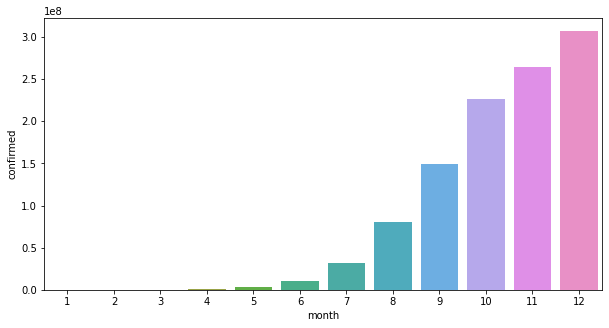

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='confirmed',data=df.total)

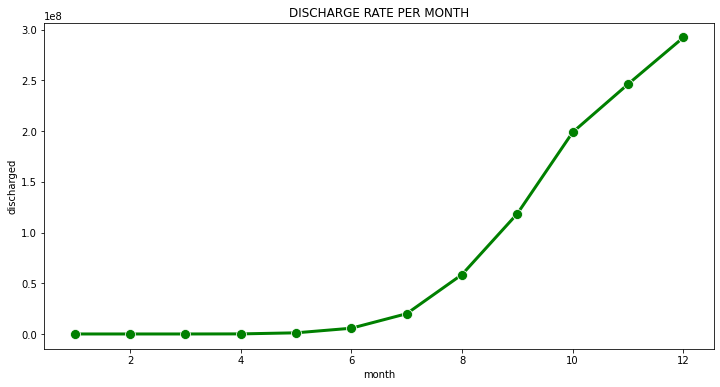

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="month",y="discharged",data=df.total,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH')
plt.show()

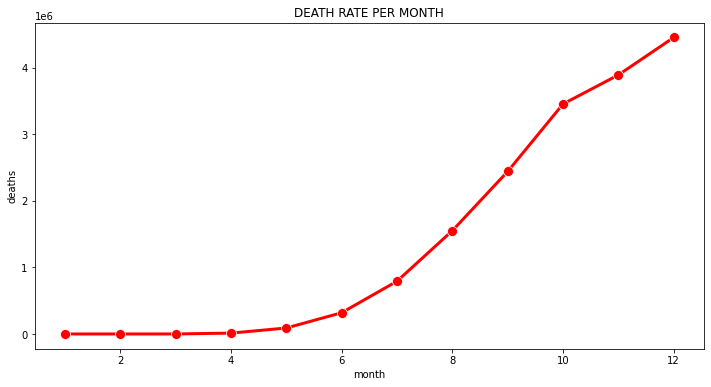

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="month",y="deaths",data=df.total,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH')
plt.show()

In [ ]:
vaccination = pd.read_csv(r"covid_vaccine_statewise.csv")

In [ ]:
vaccination

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0
